# Case Study 1 : Data Mining in Financial Data

**Financial Data Collection:** 
* Please collect five-year stock price data of at least 5 stocks. You can choose any stocks you'd like to analyze.
* You have multiple ways of collecting financial data with Python, here is a reference: https://www.alpharithms.com/python-financial-data-491110/
* Load the data you collect and start working on your idea.


# Problem: pick a data science problem that you plan to solve using Stock Price Data
* The problem should be important and interesting, which has a potential impact in some area.
* The problem should be solvable using the data available and data science solutions.

Please briefly describe in the following cell: what problem are you trying to solve? why this problem is important and interesting?

## Financial Data Stock Market Anomaly Detection

### Problem :- Variety of factors, including investor sentiment, macroeconomic indicators, and unforeseen events, can cause price fluctuations in financial market data.
Finding anomalies, or odd changes in stock prices, is a crucial part of algorithmic trading, risk management, and financial research. 
Potential dangers including price manipulation, technical issues, or unexpected market reactions might be indicated by anomalies. For this reason, analysts, investors, and regulators need to have strong anomaly detection techniques.

### Solution :- Investigating how well traditional models compare to machine learning approaches in detecting anomalies in stock prices.
I will be using Isolation Forest ML model and Z-score statistical method and further comparing which will result the best output.

# Data Collection/Processing: 

In [19]:
#----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary
# Importing all the libraries here
import yfinance as yf
import pandas as pd
import numpy as np
import csv
import time
import matplotlib.pyplot as plt

In [2]:
#Creating the 5 stocks with five-year stock price data in an CSV file
data = {
    "Symbol": ["ADBE", "AMZN", "INTC", "NVDA", "WMT"],
    "Security": ["Adobe Inc.", "Amazon.com Inc.", "Intel Corp.", "Nvidia Corporation", "Walmart"],
    "Start Date": ["6/1/2020", "6/1/2020", "6/1/2020", "6/1/2020", "6/1/2020"],
    "End Date": ["7/31/2025", "7/31/2025", "7/31/2025", "7/31/2025", "7/31/2025"]
}

df = pd.DataFrame(data)

# Save to CSV
df.to_csv("stock_list.csv", index=False)
print(df)

print("CSV file 'stock_list.csv' created successfully!")

  Symbol            Security Start Date   End Date
0   ADBE          Adobe Inc.   6/1/2020  7/31/2025
1   AMZN     Amazon.com Inc.   6/1/2020  7/31/2025
2   INTC         Intel Corp.   6/1/2020  7/31/2025
3   NVDA  Nvidia Corporation   6/1/2020  7/31/2025
4    WMT             Walmart   6/1/2020  7/31/2025
CSV file 'stock_list.csv' created successfully!


In [3]:
# Implemented get data from csv file function to get the open, high, low and close (OHLC) price by using yfinance library 
def get_data_from_csv(csv_path):
    input = pd.read_csv(csv_path)
    #Prepare an empty list store OHLC data for each stock
    all_data = []
    #Loop over each stock in the CSV
    #And converting to proper YYYY-MM-DD string format
    for _, row in input.iterrows():
        symbol = row["Symbol"]
        security = row["Security"]
        start_date = pd.to_datetime(row["Start Date"]).strftime('%Y-%m-%d')
        end_date = pd.to_datetime(row["End Date"]).strftime('%Y-%m-%d')
        #Fetching stock data from Yahoo Finance
        yf_data = yf.Ticker(symbol)
        OHLC_data = yf_data.history(
            start=start_date,
            end=end_date,
            interval="1d",
            auto_adjust=True
        )
        #If no data found for that stock, print a message
        if OHLC_data.empty:
            print(f"No data found for {symbol}")
            continue
        #Adding Symbol and Security columns
        OHLC_data.insert(0, 'Symbol', symbol)
        OHLC_data.insert(1, 'Security', security)

        all_data.append(OHLC_data)
        #Small delay to avoid hitting Yahoo Finance API too quickly
        time.sleep(0.5)
    #Combining all stock data into one DataFrame and then return it
    final_df = pd.concat(all_data)
    final_df.reset_index(inplace=True)
    final_df.set_index(["Date", "Symbol"], inplace=True)
    return final_df

In [4]:
df = get_data_from_csv("stock_list.csv")
display(df.head())
print("Summary of the Dataframe:")
display(df.describe())
print("Number of rows and columns are :-")
count=df.shape
print(count)

,,Security,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,Symbol,,,,,,,,
2020-06-01 00:00:00-04:00,ADBE,Adobe Inc.,387.079987,389.989990,382.899994,389.679993,2034100,0.0,0.0
2020-06-02 00:00:00-04:00,ADBE,Adobe Inc.,389.920013,390.910004,382.029999,390.440002,2509600,0.0,0.0
2020-06-03 00:00:00-04:00,ADBE,Adobe Inc.,390.820007,391.140015,387.459991,389.920013,2537100,0.0,0.0
2020-06-04 00:00:00-04:00,ADBE,Adobe Inc.,389.500000,395.720001,382.279999,385.799988,2422600,0.0,0.0
2020-06-05 00:00:00-04:00,ADBE,Adobe Inc.,384.640015,396.170013,382.000000,392.899994,2793700,0.0,0.0


Summary of the Dataframe:


,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,6490.000000,6490.000000,6490.000000,6490.000000,6.490000e+03,6490.000000,6490.000000
mean,155.205530,157.124475,153.179856,155.191915,1.101895e+08,0.001332,0.005701
std,172.629995,174.630863,170.480573,172.606557,1.756407e+08,0.018488,0.284383
min,8.699324,8.804197,8.625618,8.736703,5.892000e+05,0.000000,0.000000
25%,41.290123,41.835226,40.898853,41.257145,1.454908e+07,0.000000,0.000000
50%,66.534749,67.048266,65.957045,66.608822,3.549515e+07,0.000000,0.000000
75%,178.120125,180.105000,176.238129,178.477501,8.729165e+07,0.000000,0.000000
max,696.280029,699.539978,678.909973,688.369995,1.543911e+09,0.365000,20.000000


Number of rows and columns are :-
(6490, 8)


# Data Exploration: Exploring the Dataset

**Plot the daily, weekly and monthly returns of a set of stocks of your choice** 
* references:
    * https://www.investopedia.com/terms/y/yearly-rate-of-return-method.asp
    * https://www.fool.com/knowledge-center/how-to-calculate-a-monthly-return-on-investment/#:~:text=Take%20the%20ending%20balance%2C%20and,corresponds%20to%20your%20monthly%20return.
    * https://www.investopedia.com/terms/i/intraday-return.asp#:~:text=How%20Is%20Daily%20Return%20Calculated,price%2C%20then%20multiply%20by%20100. 


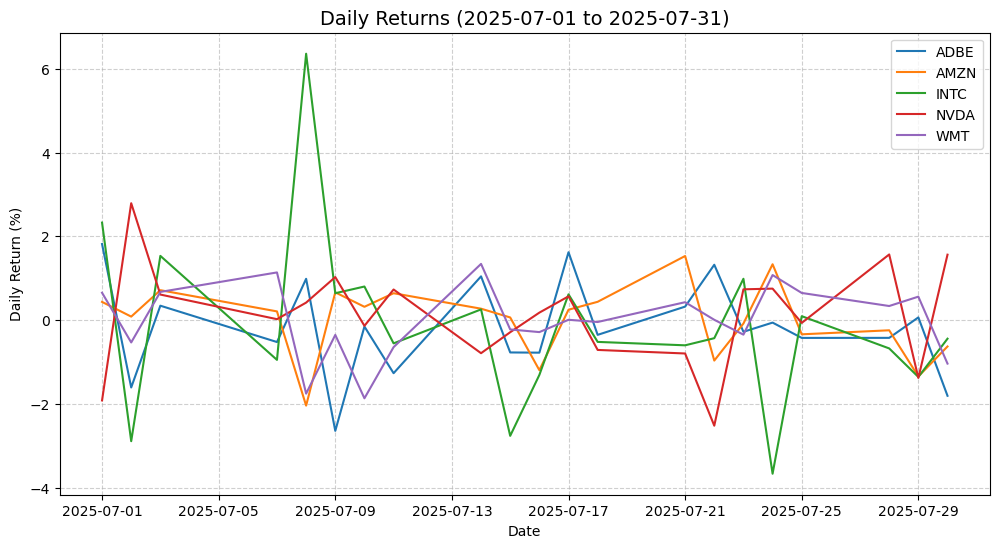

In [5]:
#Plotting the daily returns of the 5 stocks
###########################################

#Loading stocks details from the CSV file
final_df = get_data_from_csv("stock_list.csv")
# Defining the date range for particular dates
start_date = "2025-07-01"
end_date = "2025-07-31"
# Filtering date range by using index level
filtered_df = final_df.loc[(final_df.index.get_level_values('Date') >= start_date) & (final_df.index.get_level_values('Date') <= end_date)].copy()
# Calculate daily returns using your formula
filtered_df['Daily_Return'] = ((filtered_df['Close'] - filtered_df['Open']) / filtered_df['Open']) * 100
# List of stock symbols
stock_names = filtered_df.index.get_level_values('Symbol').unique()
# Plotting daily returns by slicing with respect to symbol
plt.figure(figsize=(12, 6))
# Looping through each stock and calculate daily returns
for symbol in stock_names:
    stock_data = filtered_df.xs(symbol, level='Symbol')
    plt.plot(stock_data.index, stock_data['Daily_Return'], label=symbol)
plt.title(f'Daily Returns ({start_date} to {end_date})', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

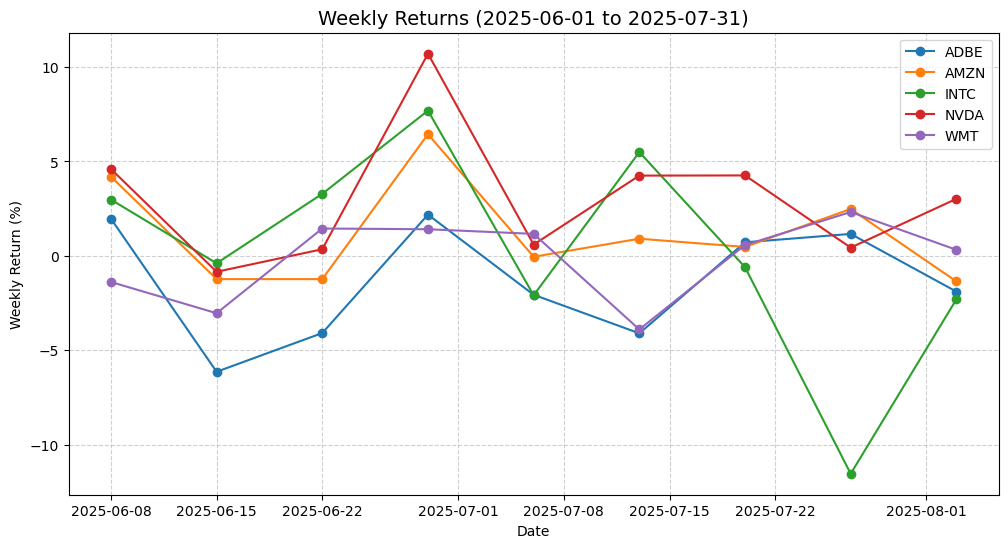

In [6]:
#Plotting the Weekly returns of the 5 stocks
###########################################

final_df = get_data_from_csv("stock_list.csv")
start_date = "2025-06-01"
end_date = "2025-07-31"
filtered_df = final_df.loc[(final_df.index.get_level_values('Date') >= start_date) & (final_df.index.get_level_values('Date') <= end_date)].copy()
plt.figure(figsize=(12, 6))
# Looping through each stock and calculate weekly returns
for symbol, stock_df in filtered_df.groupby(level='Symbol'):
    # Keeping only Date as index
    stock_df = stock_df.droplevel('Symbol')
    # Resample to weekly and get first Open, last Close from the dataframe
    weekly_data = stock_df.resample("W").agg({"Open": "first", "Close": "last"})
    # Weekly returns formula 
    weekly_returns = ((weekly_data['Close'] - weekly_data['Open']) / weekly_data['Open']) * 100
    #To remove any NaN values that appear after the calculation to avoid gaps in the plot
    weekly_returns = weekly_returns.dropna()
    # Weekly x-axis by keeping weeks offset
    weekly_x = [7 * i for i in range(1, len(weekly_returns) + 1)]
    plt.plot(weekly_data.index, weekly_returns, marker='o', label=symbol)
plt.title(f"Weekly Returns ({start_date} to {end_date})", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Weekly Return (%)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

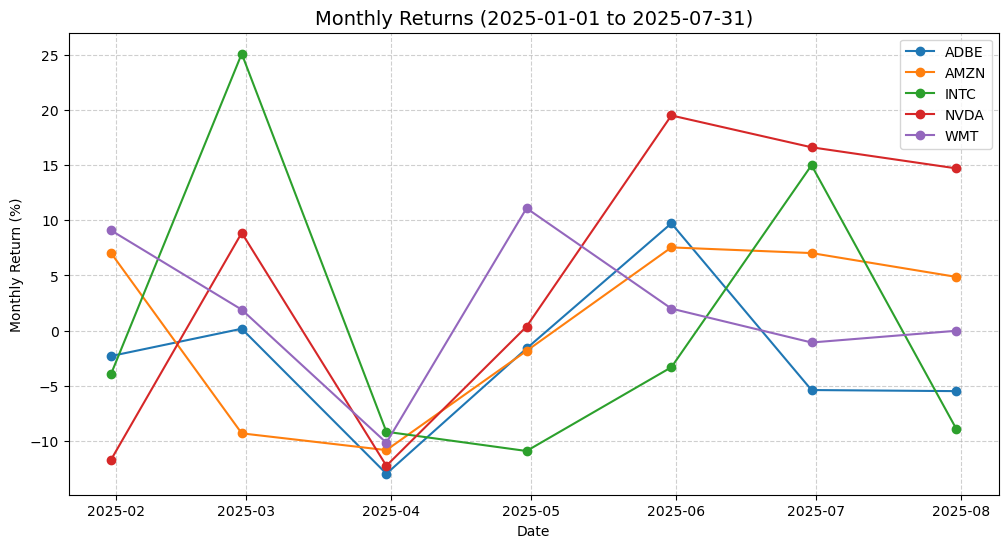

In [7]:
#Plotting the Monthly returns of the 5 stocks
###########################################

final_df = get_data_from_csv("stock_list.csv")
start_date = "2025-01-01"
end_date = "2025-07-31"
filtered_df = final_df.loc[(final_df.index.get_level_values('Date') >= start_date) & (final_df.index.get_level_values('Date') <= end_date)].copy()
plt.figure(figsize=(12, 6))
# Loop through each stock and calculate monthly returns
for symbol, stock_df in filtered_df.groupby(level='Symbol'):
    stock_df = stock_df.droplevel('Symbol')
    monthly_data = stock_df.resample("ME").agg({"Open": "first", "Close": "last"})
    monthly_returns = ((monthly_data['Close'] - monthly_data['Open']) / monthly_data['Open']) * 100
    monthly_returns = monthly_returns.dropna()
    plt.plot(monthly_data.index, monthly_returns, marker='o', label=symbol)
plt.title(f"Monthly Returns ({start_date} to {end_date})", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Monthly Return (%)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

**Other data explorations you would like to present:**

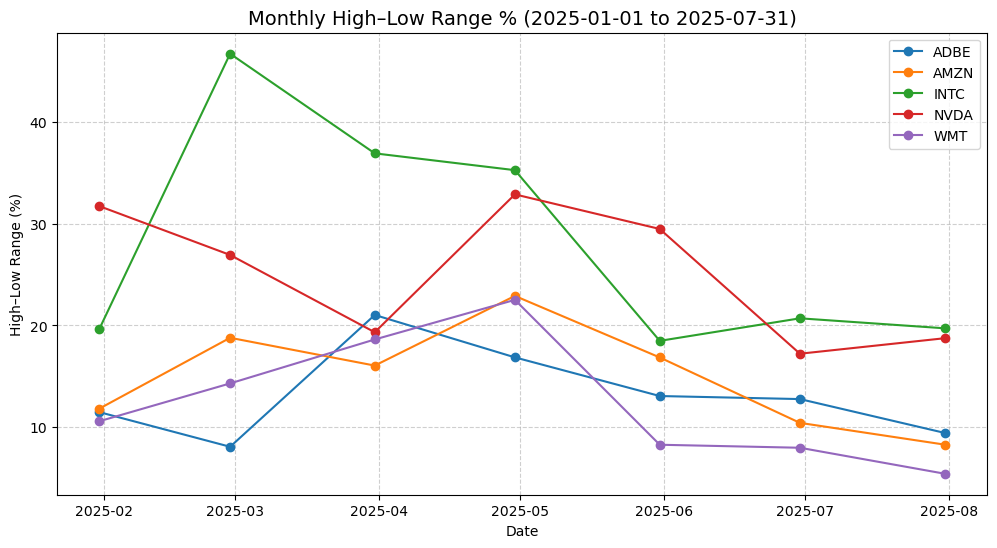

In [8]:
#High–Low Range Analysis
#The High–Low Range Analysis is a common way to measure volatility and price movement strength within a given period of time
#It measures the difference between the highest and lowest prices in a period
#It is useful for multiple reasons such as :-
#Large High–Low ranges indicate volatile sessions.
#If the daily range suddenly increases compared to recent days, it could mean a breakout or strong market reaction to news.
#Traders use the range to set stop-loss levels based on volatility.
# Thus helps in spot breakouts, false moves, and trend exhaustion
final_df = get_data_from_csv("stock_list.csv")
start_date = "2025-01-01"
end_date = "2025-07-31"
filtered_df = final_df.loc[(final_df.index.get_level_values('Date') >= start_date) & (final_df.index.get_level_values('Date') <= end_date)].copy()
stock_names = filtered_df.index.get_level_values('Symbol').unique()
monthly_list = []
for symbol in stock_names:
    stock_data = filtered_df.xs(symbol, level='Symbol')
    monthly_data = stock_data.resample("ME").agg({"High": "max", "Low": "min"})
    # Formula for High–Low range and converting it to percantage
    monthly_data["High_Low_Range"] = monthly_data["High"] - monthly_data["Low"]
    monthly_data["High_Low_Range_%"] = (monthly_data["High_Low_Range"] / monthly_data["Low"]) * 100
    monthly_data["Symbol"] = symbol
    monthly_list.append(monthly_data)
monthly_range_df = pd.concat(monthly_list)
monthly_range_df.set_index("Symbol", append=True, inplace=True)
monthly_range_df = monthly_range_df.reorder_levels(["Date", "Symbol"]).sort_index()
plt.figure(figsize=(12, 6))
for symbol in stock_names:
    stock_data = monthly_range_df.xs(symbol, level="Symbol")
    plt.plot(stock_data.index, stock_data["High_Low_Range_%"], marker="o", label=symbol)
plt.title(f"Monthly High–Low Range % ({start_date} to {end_date})", fontsize=14)
plt.xlabel("Date")
plt.ylabel("High–Low Range (%)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

In [ ]:
# Example : In the Above plot if we see for INTC stock the High–Low % range for 2025-02 was 20% and in 2025-03 it goes to 50% 
# This indicates that something unusual happened as earnings, news or market shock.

# The Solution: implement a data science solution to the problem you are trying to solve.

**Briefly describe the idea of your solutions to the problem in the following cell (you should use at least 2 methods/models to solve the problem, and compare the performance. Feel free to use any machine learning models or statistical models.):**

In [9]:
# An anomaly is an unusual price movement that does not match the expected pattern or trend. It can be caused by multiple reasons 
# as sudden large price spikes/drops, unusual volatility and sometime market shocks such as news events, earnings reports, economic data, etc.

# **Example, a stock’s daily movement is usually between -2% and +2%, and suddenly it drops by -10%, that’s an anomaly.**

# Machine learning has introduced to detect more subtle and non-linear patterns in market behavior. Specifically, I will compare with 
# unsupervised Non label that is ML methods "Isolation Forest" it will Use historical stock data from 5 stocks which will evaluates the ability to detect meaningful anomalies.

# ## Isolation Forest ML Model :-
# Isolation Forest is a machine learning algorithm designed specifically for anomaly detection. It Works well for high-dimensional time series, 
# isolates anomalies by random splitsavailable in sklearn library. It is Fast and memory-efficient with complexity O(n log n).
# If in a stock prices there is a sudden sharp drop or spike that doesn't match the historical trend it will be isolated quickly. The 
# Isolation Forest model will assign that point an anomaly score and label it as -1.

# ## Second I am using Z-score–based anomaly detection which is basically a statistical method.
# The Z-score tells us how many standard deviations a data point is away from the mean. A Z-score close to 0 means the value is near the mean.
# A very high positive Z-score means the value is far above the mean and very low negative Z-score means the value is far below the mean.
# I will define a threshold (commonly 3 or -3), If 𝑍 > 3 or 𝑍 < −3 the point is considered an anomaly.

**Write codes to implement the solution in python:**

In [10]:
# Isolation Forest Model Code Implementation
from sklearn.ensemble import IsolationForest

In [11]:
def detect_anomalies_isolationforest(final_df, start_date, end_date):
    filtered_df = final_df.loc[(final_df.index.get_level_values('Date') >= start_date) & (final_df.index.get_level_values('Date') <= end_date)].copy()
    results_list = []
    # Loop through each stock
    for symbol, stock_df in filtered_df.groupby(level="Symbol"):
        stock_df = stock_df.droplevel("Symbol")
        # If there is less data or rows skip it as it will create problems to train a model
        if stock_df.shape[0] < 10:
            continue
        # Get the close prices for anomaly detection
        X = stock_df[['Close']].values
        # Isolation Forest Model for unsupervised anomaly detection algorithm
        # Set 5% of data points as a anomalies
        # This will return -1 for anomaly and 1 for normal point
        # I have set the seed for the internal random number generator at default value of 42 this will result in the same anomalies detections
        iso_forest = IsolationForest(contamination=0.05, random_state=42)
        stock_df['Anomaly'] = iso_forest.fit_predict(X)
        # Keep results with symbol colume as we drop it earlier
        stock_df['Symbol'] = symbol
        results_list.append(stock_df)
    #Combining and results with date and symbol as columns
    anomaly_df = pd.concat(results_list).reset_index()
    # Set -1 for anomaly only records
    anomalies_only = anomaly_df[anomaly_df['Anomaly'] == -1]
    for symbol in anomaly_df['Symbol'].unique():
        sym_df = anomaly_df[anomaly_df['Symbol'] == symbol]
        plt.figure(figsize=(12, 5))
        plt.plot(sym_df['Date'], sym_df['Close'], label="Close Price", color='blue')
        #Here X-axis values are the dates where anomalies are detected and Y-axis values with closing prices on those anomaly dates
        plt.scatter(sym_df['Date'][sym_df['Anomaly'] == -1], sym_df['Close'][sym_df['Anomaly'] == -1], color='red', marker='o', s=80, label="Anomaly")
        plt.title(f"{symbol} - Anomaly Detection (Isolation Forest)")
        plt.xlabel("Date")
        plt.ylabel("Close Price")
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.show()

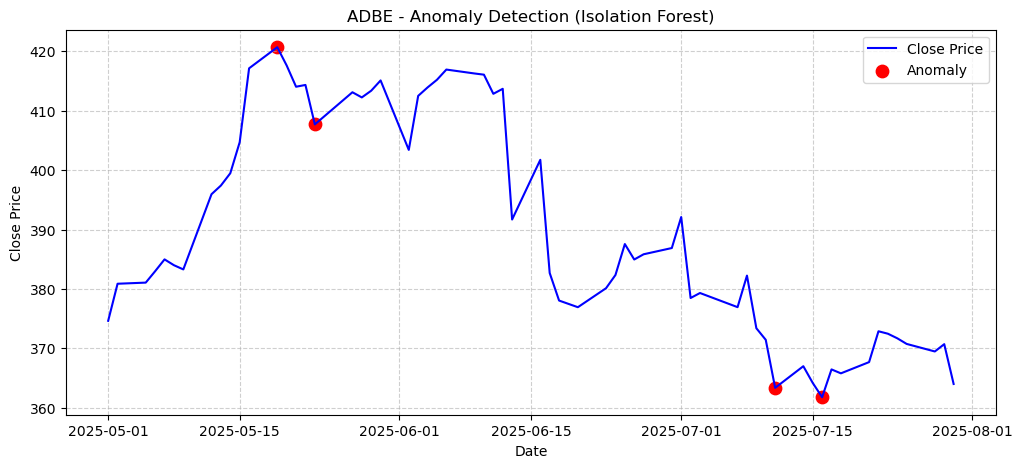

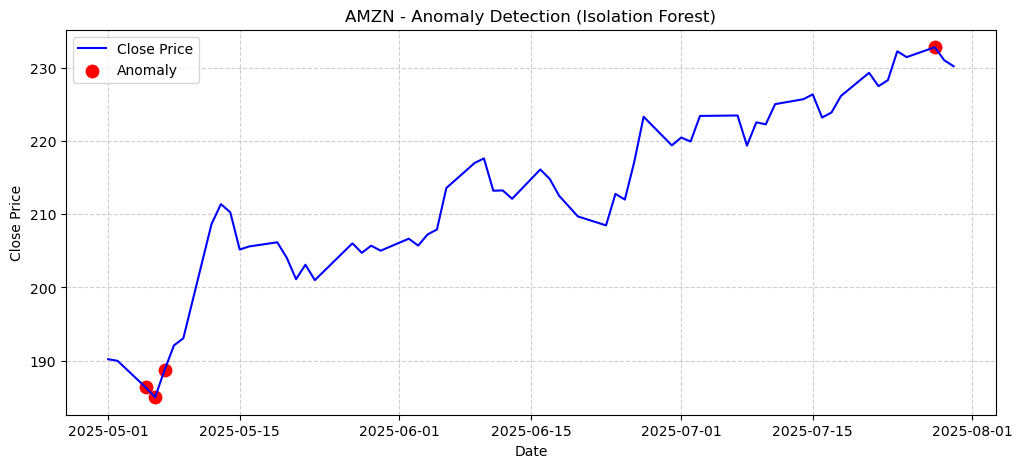

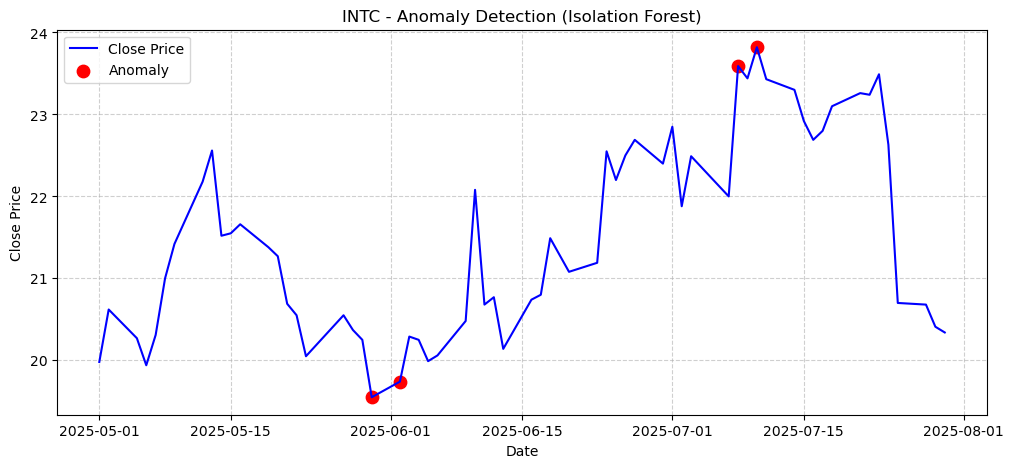

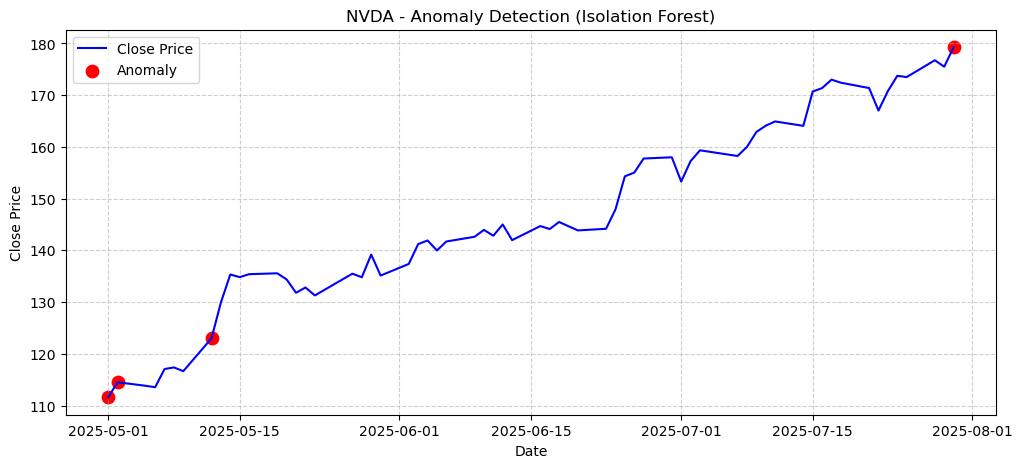

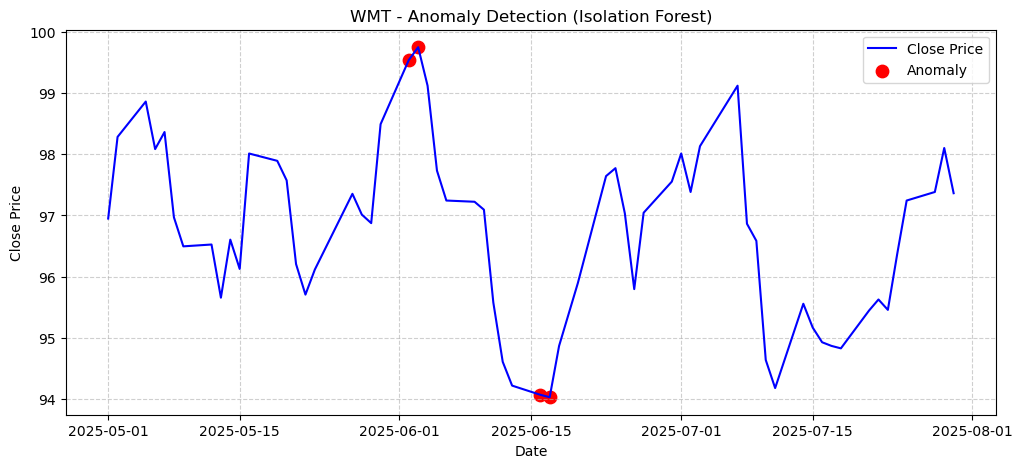

In [12]:
# Example usage:
final_df = get_data_from_csv("stock_list.csv")
detect_anomalies_isolationforest(final_df, "2025-05-01", "2025-07-31")

In [13]:
# Looking at this plot for ADBE (Adobe) by using Isolation Forest Model 
                               
# In the mid-may 2025 the price sharply rose above 420, higher than the usual recent prices.The model considers it abnormal 
# because the increase was unusually steep compared to previous movements.

# Next in mid-july there is again a sharp decline the price dropped to ~364, much lower than recent prices (380–400 range).This is a 
# downside anomaly indicating an unusual market sell-off or a negative news event.

In [14]:
# Z-score statistical method based anomaly detection examples using scipy.stats.zscore
from scipy.stats import zscore

In [15]:
def detect_anomalies_zscore(final_df, start_date, end_date, threshold=3):
    filtered_df = final_df.loc[(final_df.index.get_level_values('Date') >= start_date) &(final_df.index.get_level_values('Date') <= end_date)].copy()
    results_list = []
    #Looping through each stock for zscore model
    for symbol, stock_df in filtered_df.groupby(level="Symbol"):
        stock_df = stock_df.droplevel("Symbol")
        # Compute Z-scores using scipy 
        # The nan_policy ignores any missing values
        stock_df['Z_Score'] = zscore(stock_df['Close'], nan_policy='omit')
        # Here the abs() takes the absolute Z-score
        #If the absolute value is greater than the chosen threshold it’s flagged as an anomaly.
        # Just like creates a True or False
        stock_df['Anomaly'] = stock_df['Z_Score'].abs() > threshold
        stock_df['Symbol'] = symbol
        #Appends the processed DataFrame for each stock into a list
        results_list.append(stock_df)
    anomaly_df = pd.concat(results_list).reset_index()
    #Plot the results for each stock
    for symbol in anomaly_df['Symbol'].unique():
        sym_df = anomaly_df[anomaly_df['Symbol'] == symbol]
        plt.figure(figsize=(12, 5))
        plt.plot(sym_df['Date'], sym_df['Close'], label="Close Price", color='blue')
        plt.scatter(sym_df['Date'][sym_df['Anomaly']],sym_df['Close'][sym_df['Anomaly']],color='red', marker='o', s=80, label="Anomaly")
        plt.title(f"Z-score Anomaly Detection ({symbol})", fontsize=14)
        plt.xlabel("Date")
        plt.ylabel("Close Price")
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.show()
    return anomaly_df

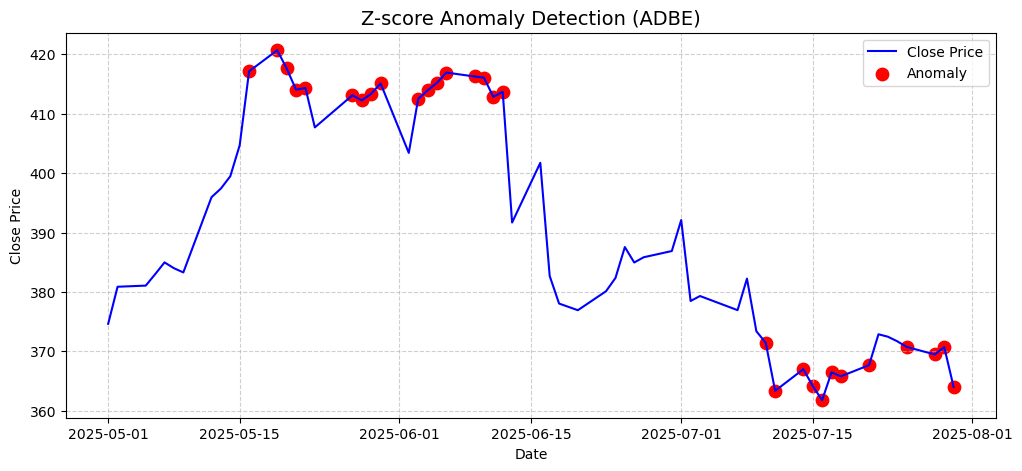

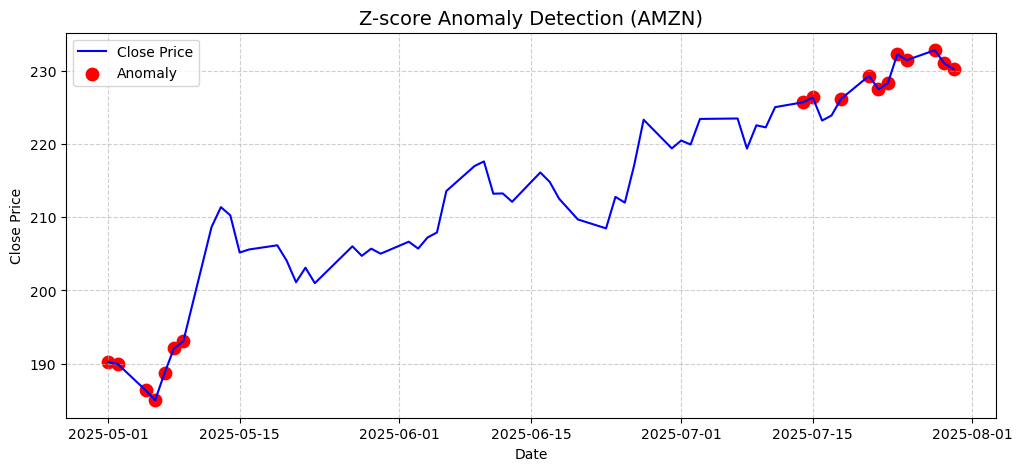

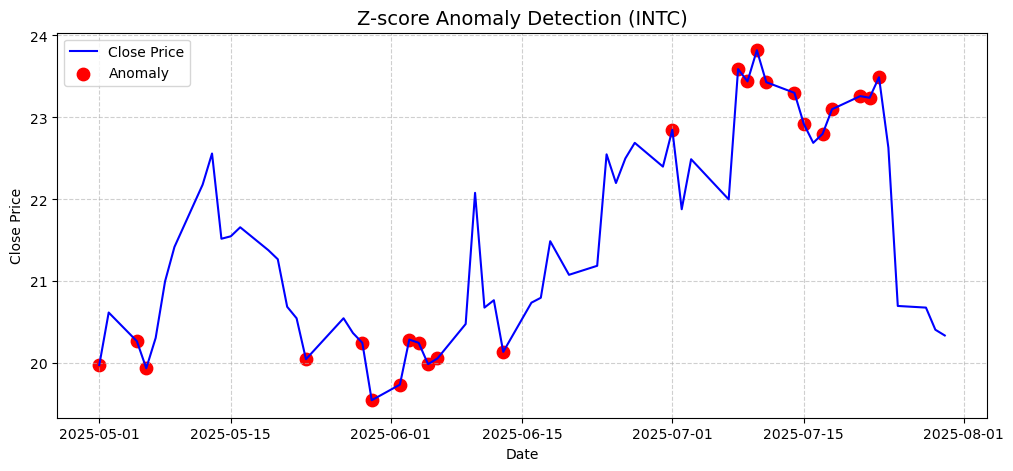

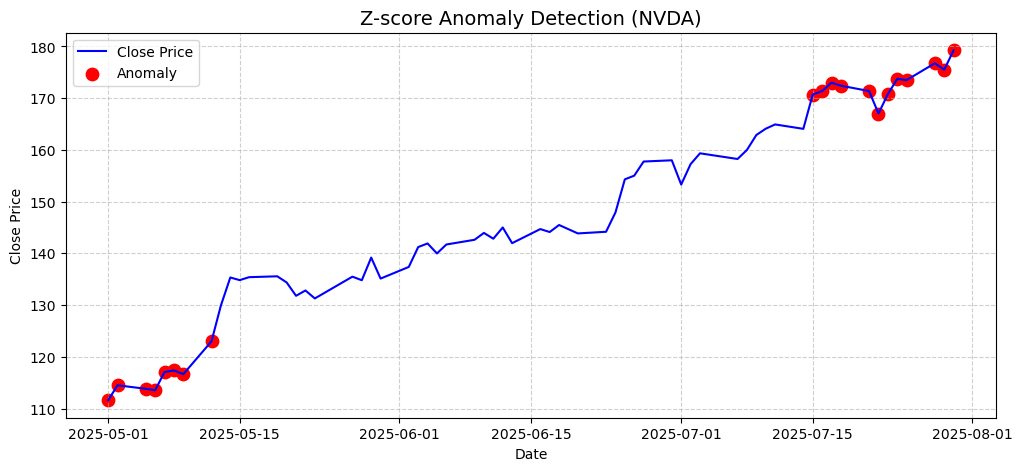

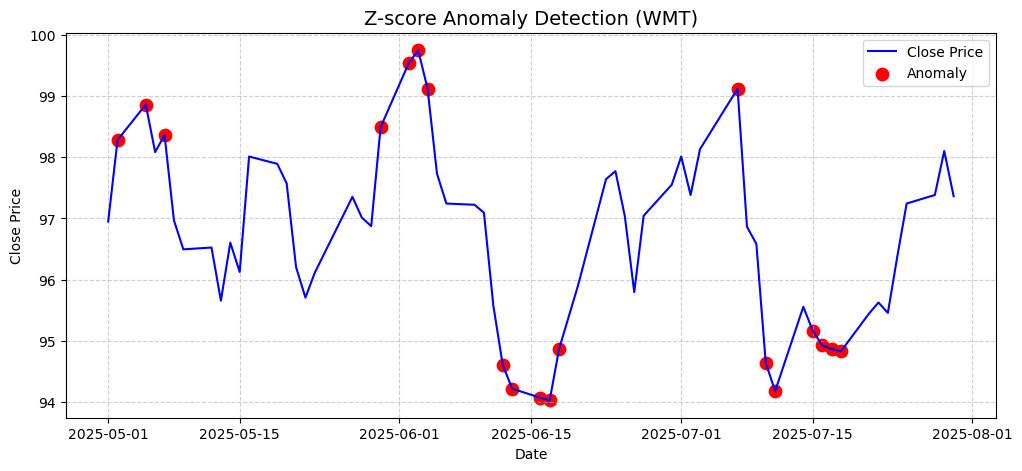

In [16]:
final_df = get_data_from_csv("stock_list.csv")
zscore_anomaly_df = detect_anomalies_zscore(final_df, "2025-05-01", "2025-07-31", threshold=1)

In [17]:
# Looking at this plot for ADBE (Adobe) by using Z-score statistical method 

# In mid-may to mid-June 2025 many anomalies occur near the peak close prices ~420. This suggests an unusual upward movement compared 
# to the average possibly driven by earnings announcements, news, or a strong bullish run. The Z-score flagged them because they were 
# much higher than the historical mean for that period.

# In mid-july 2025 onward another cluster of anomalies appears when prices drop to the 360–370 range.

# Results: summarize and visualize the results discovered from the analysis

**Summarize the results of different models. Compare the perfomance and explain it. Please use figures or tables to present the results.**



--- Anomaly Detection Summary ---
        IsolationForest_Anomalies  ZScore_Anomalies
Symbol                                             
ADBE                           65               483
AMZN                           65               406
INTC                           64               538
NVDA                           65               292
WMT                            65               258


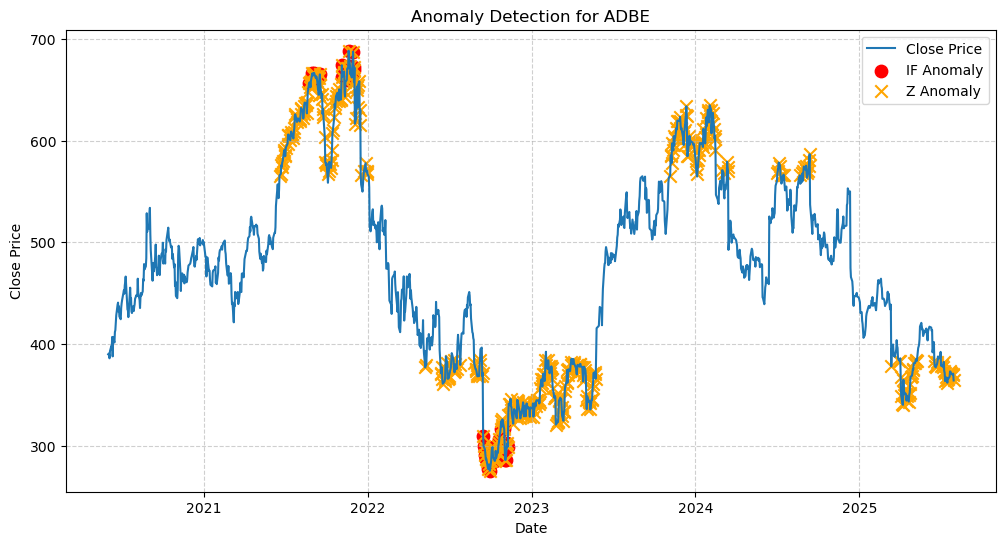

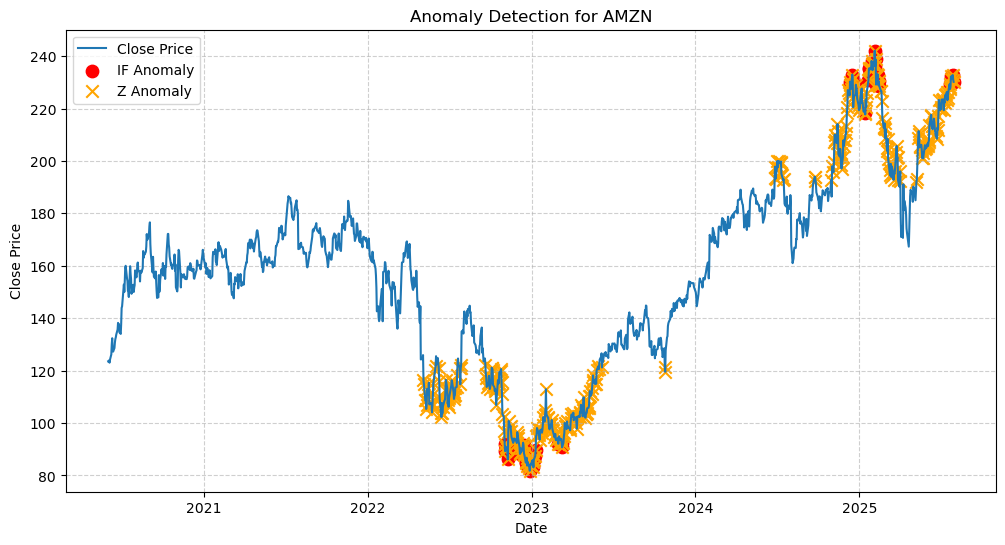

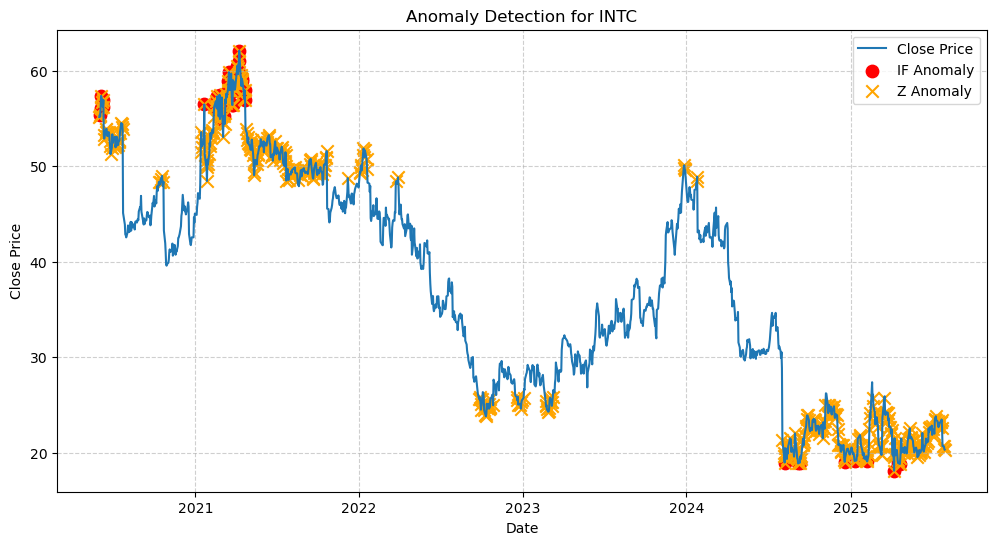

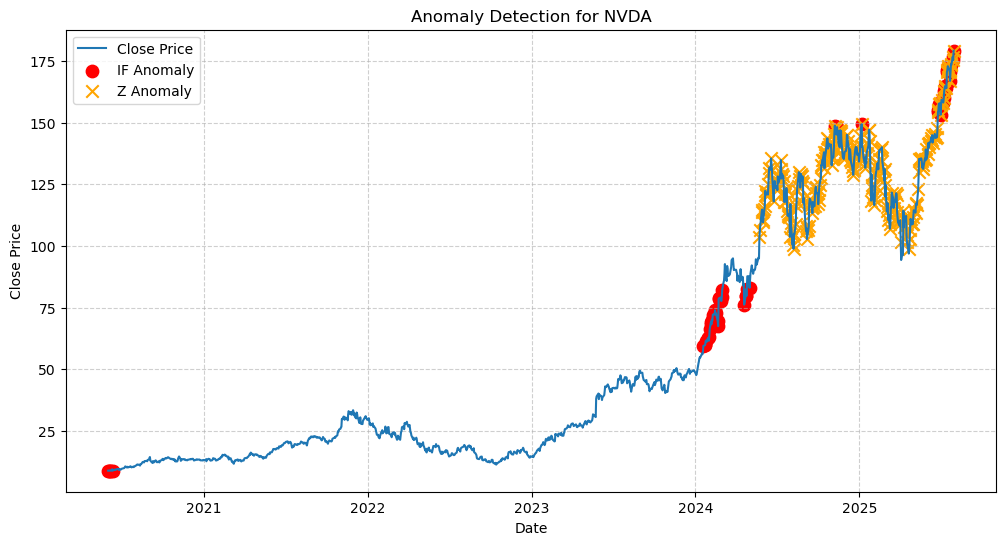

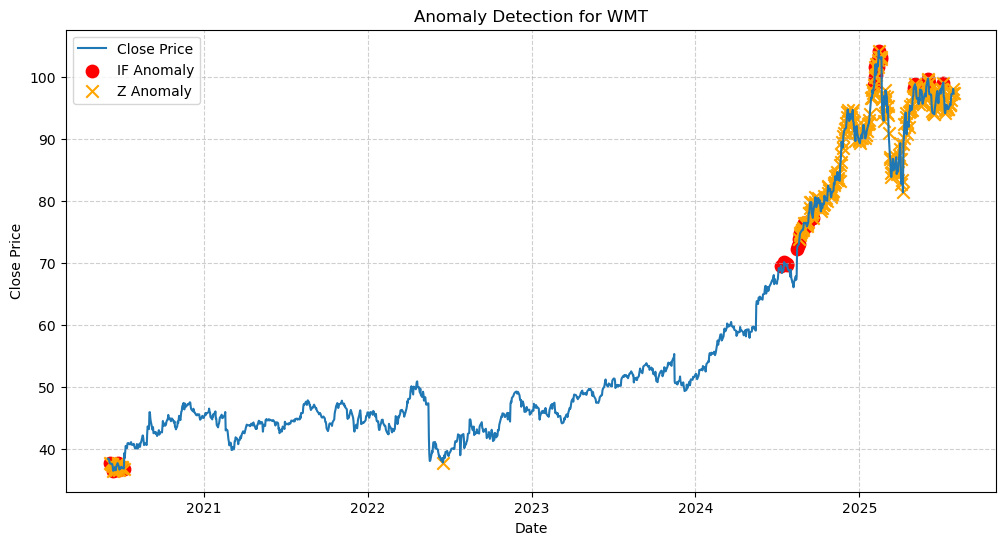

In [20]:
final_df = get_data_from_csv("stock_list.csv")
iso_results = []
#For Isolation Forest model
for symbol, stock_df in final_df.groupby(level="Symbol"):
    stock_df = stock_df.droplevel("Symbol")
    X = stock_df[['Close']].values
    iso_forest = IsolationForest(contamination=0.05, random_state=42)
    stock_df['Anomaly_IF'] = iso_forest.fit_predict(X)
    stock_df['Symbol'] = symbol
    iso_results.append(stock_df)
iso_df = pd.concat(iso_results)
#For zscore model  
z_results = []
for symbol, stock_df in final_df.groupby(level="Symbol"):
    stock_df = stock_df.droplevel("Symbol")
    z_scores = (stock_df['Close'] - stock_df['Close'].mean()) / stock_df['Close'].std()
    stock_df['Anomaly_Z'] = np.where(np.abs(z_scores) > 1, -1, 1)
    stock_df['Symbol'] = symbol
    z_results.append(stock_df)
z_df = pd.concat(z_results)
# Keep Date and Symbol as columns
iso_df = iso_df.reset_index()   
z_df = z_df.reset_index()
# Merge on both Date and Symbol
comparison_df = pd.merge(
    iso_df[['Date', 'Symbol', 'Close', 'Anomaly_IF']],
    z_df[['Date', 'Symbol', 'Anomaly_Z']],
    on=['Date', 'Symbol'],
    how='inner'
)
# Summaries table by using lambda
summary = comparison_df.groupby('Symbol').agg({
    'Anomaly_IF': lambda x: (x == -1).sum(),
    'Anomaly_Z': lambda x: (x == -1).sum()
}).rename(columns={
    'Anomaly_IF': 'IsolationForest_Anomalies',
    'Anomaly_Z': 'ZScore_Anomalies'
})
print("\n--- Anomaly Detection Summary ---")
print(summary)
#Plot for ALL stocks ---
for symbol in comparison_df['Symbol'].unique():
    stock_data = comparison_df[comparison_df['Symbol'] == symbol]
    plt.figure(figsize=(12, 6))
    plt.plot(stock_data['Date'], stock_data['Close'], label='Close Price')
    # Mark Isolation Forest anomalies
    plt.scatter(
        stock_data['Date'][stock_data['Anomaly_IF'] == -1],
        stock_data['Close'][stock_data['Anomaly_IF'] == -1],
        color='red', marker='o', s=80, label="IF Anomaly"
    )
    # Mark Z-Score anomalies
    plt.scatter(
        stock_data['Date'][stock_data['Anomaly_Z'] == -1],
        stock_data['Close'][stock_data['Anomaly_Z'] == -1],
        color='orange', marker='x', s=80, label="Z Anomaly"
    )
    plt.title(f"Anomaly Detection for {symbol}")
    plt.xlabel("Date")
    plt.ylabel("Close Price")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.show()

In [21]:
# ### Conclusion
# From the above results we can say that Isolation Forest detected ~64–65 anomalies for each stock, showing it applies a consistent 
# anomaly detection threshold across all tickers.
# Where as, Z-score method flagged many more anomalies, especially for ADBE 483 and INTC 538

# Z-score is sensitive to volatility so if a stock’s prices fluctuate a lot, many points will exceed the threshold. Isolation Forest 
# focuses more on relative rarity in the data distribution, making it less sensitive to general volatility.

# Isolation Forest is more conservative, detecting a fixed range of anomalies (~64–65) regardless of volatility. 
# It’s better when you want consistent anomaly counts and focus on truly unusual patterns in distribution.

# Z-score is more aggressive, flagging any large deviation from the mean. 
# This is better for detecting frequent fluctuations but can produce many false positives in volatile stocks.

# For financial market anomaly detection, Isolation Forest might be preferred for rare event detection, 
# while Z-score could be useful for short-term volatility monitoring.

# Future studies could include more stocks across different sectors, time periods, or regions to evaluate how well the model 
# generalizes under different market conditions. Models such as Long Short-Term Memory (LSTM) networks or Transformer-based 
# models could be applied to capture more. Real-time anomaly detection would allow for more responsive risk management 
# and trading decisions.


# Done

All set! 

**What do you need to submit?**

* **Notebook File**: Save this Jupyter notebook, and submit it in BrightSpace. This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. 


**How to submit:**
* Please submit through BrightSpace, in the Assignment "Case Study 1".
        
        
